In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\Amazon Sale Report 1.csv"
df = pd.read_csv(path)

In [3]:
df.iloc[:, :10].head(3)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [4]:
df.iloc[:, 10:20].head(3)


,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [5]:
df.iloc[:, 20:30].head(3)


,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,NaN,False,Easy Ship,NaN
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [6]:
df.shape

(128975, 24)

In [7]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'object')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'number')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [14]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [15]:
df.iloc[:, :10].head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [16]:
df.iloc[:, 10:20].head(3)

,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,Shipped,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [17]:
df.iloc[:, 20:30].head(3)

,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

<Axes: xlabel='Date,Day'>

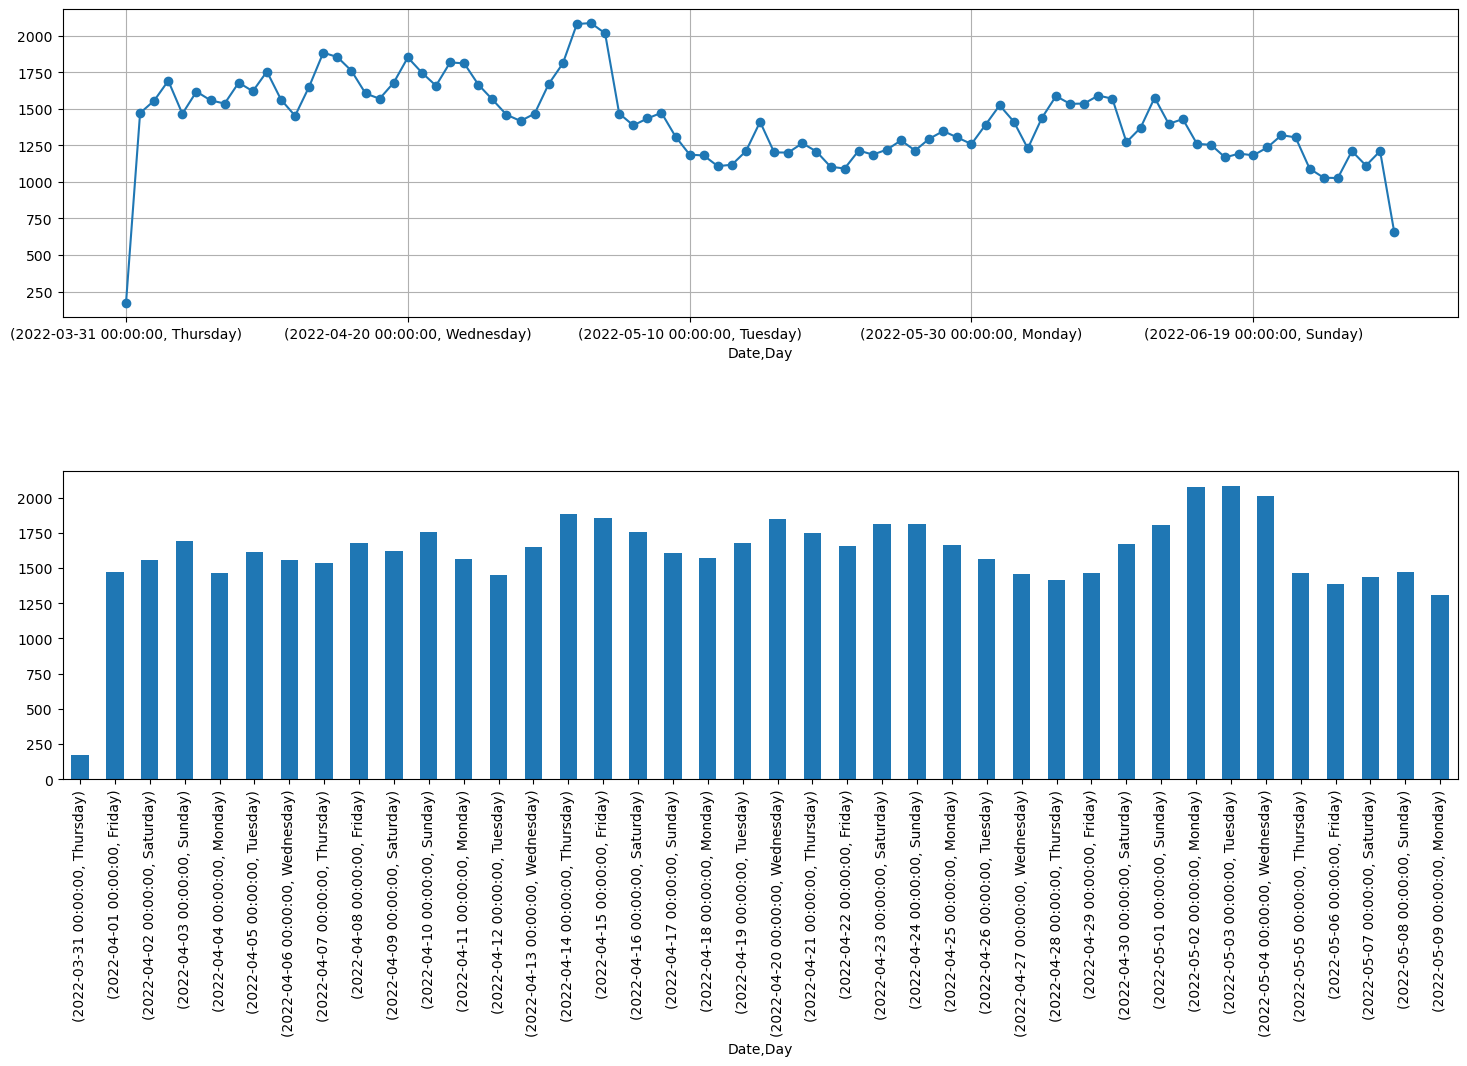

In [20]:
#How do order volumes fluctuate from one day to the next, and are there any specific trends linked to certain weekdays?
fig, axes =  plt.subplots(2, 1)
plt.subplots_adjust(hspace = 0.5)
df.groupby(['Date', 'Day'])['Amount'].count().plot(kind = "line", marker = "o", grid = True, figsize = (18, 10), rot = 0, ax = axes[0])
df.groupby(['Date', 'Day'])['Amount'].count()[:40].plot(kind = "bar", grid = False, figsize = (18, 10), rot = 90, ax = axes[1])

<Axes: xlabel='Day'>

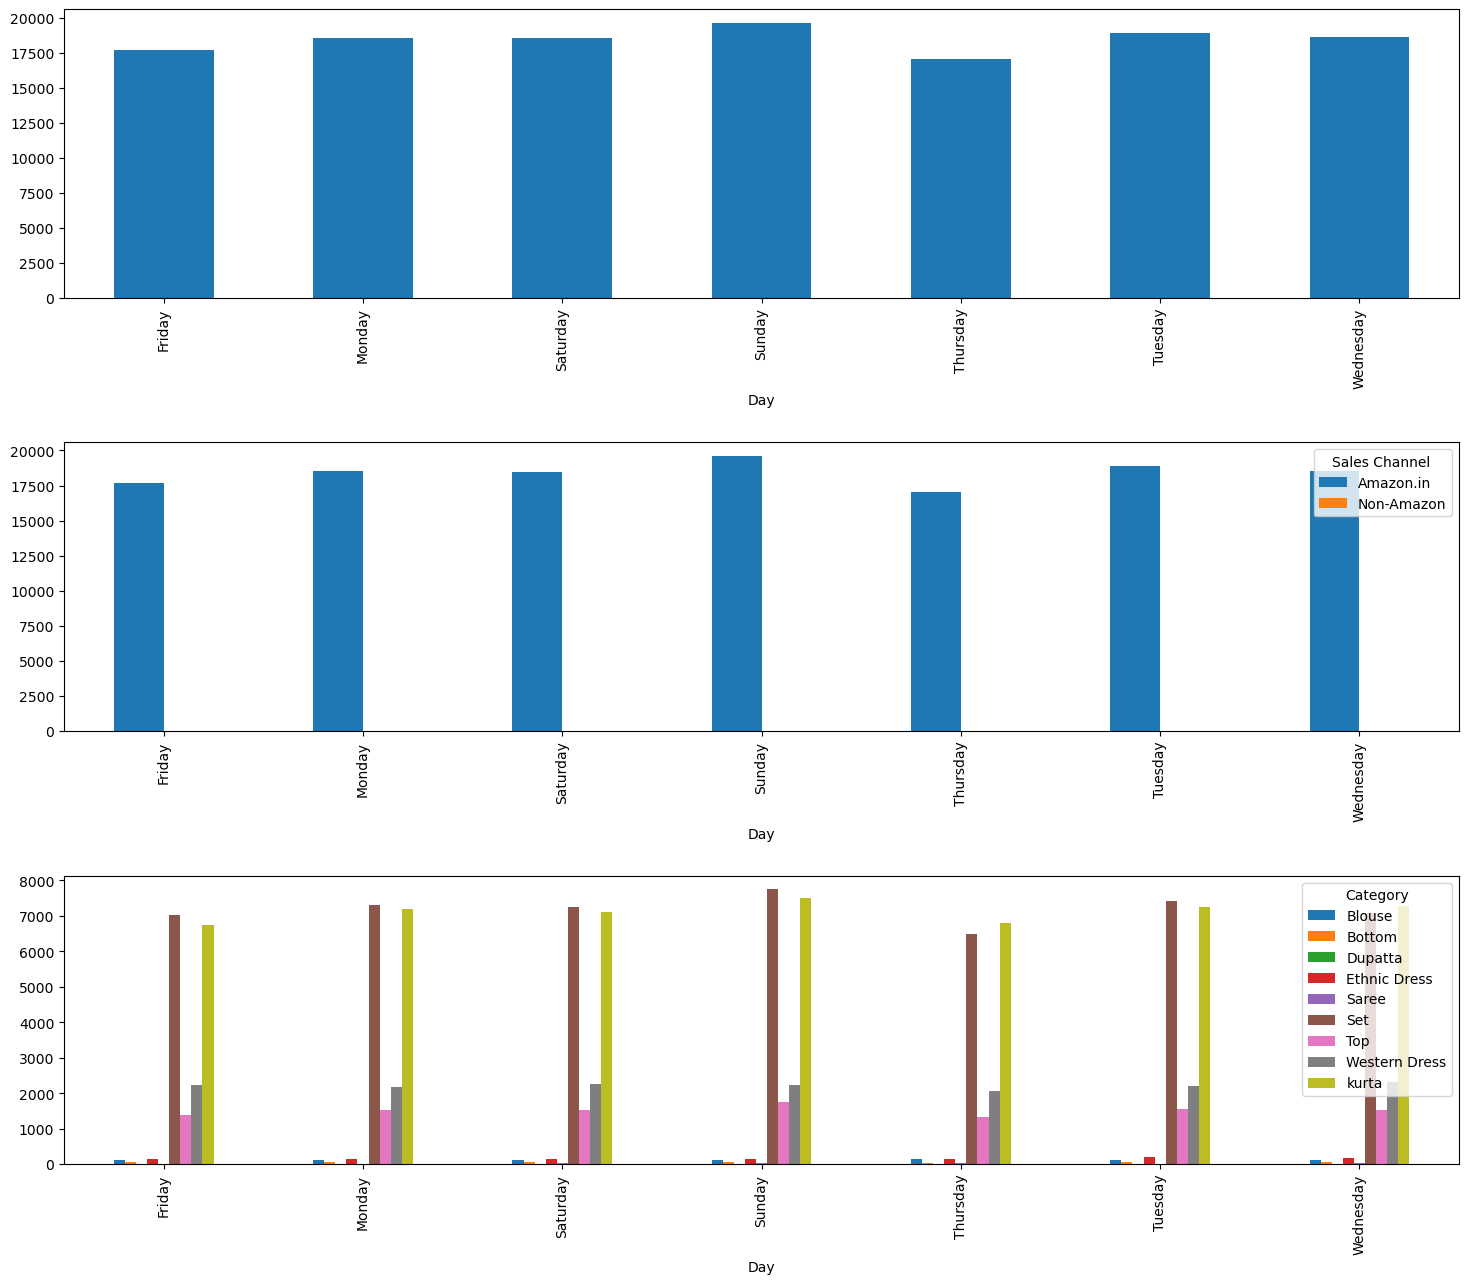

In [21]:
#What day sees the highest frequency of orders being placed, and does this vary by sales channel or product category?
fig, axes =  plt.subplots(3, 1, figsize = (18, 15))
plt.subplots_adjust(hspace = 0.5)
df.groupby(['Day'])['Amount'].count().plot(kind = 'bar', ax = axes[0])
df.groupby(['Day', 'Sales Channel '])['Amount'].count().unstack('Sales Channel ').plot(kind = 'bar', ax = axes[1])
df.groupby(['Category', 'Day'])['Amount'].count().unstack('Category').plot(kind = 'bar', ax = axes[2])

<Axes: xlabel='Date,currency,ship-state'>

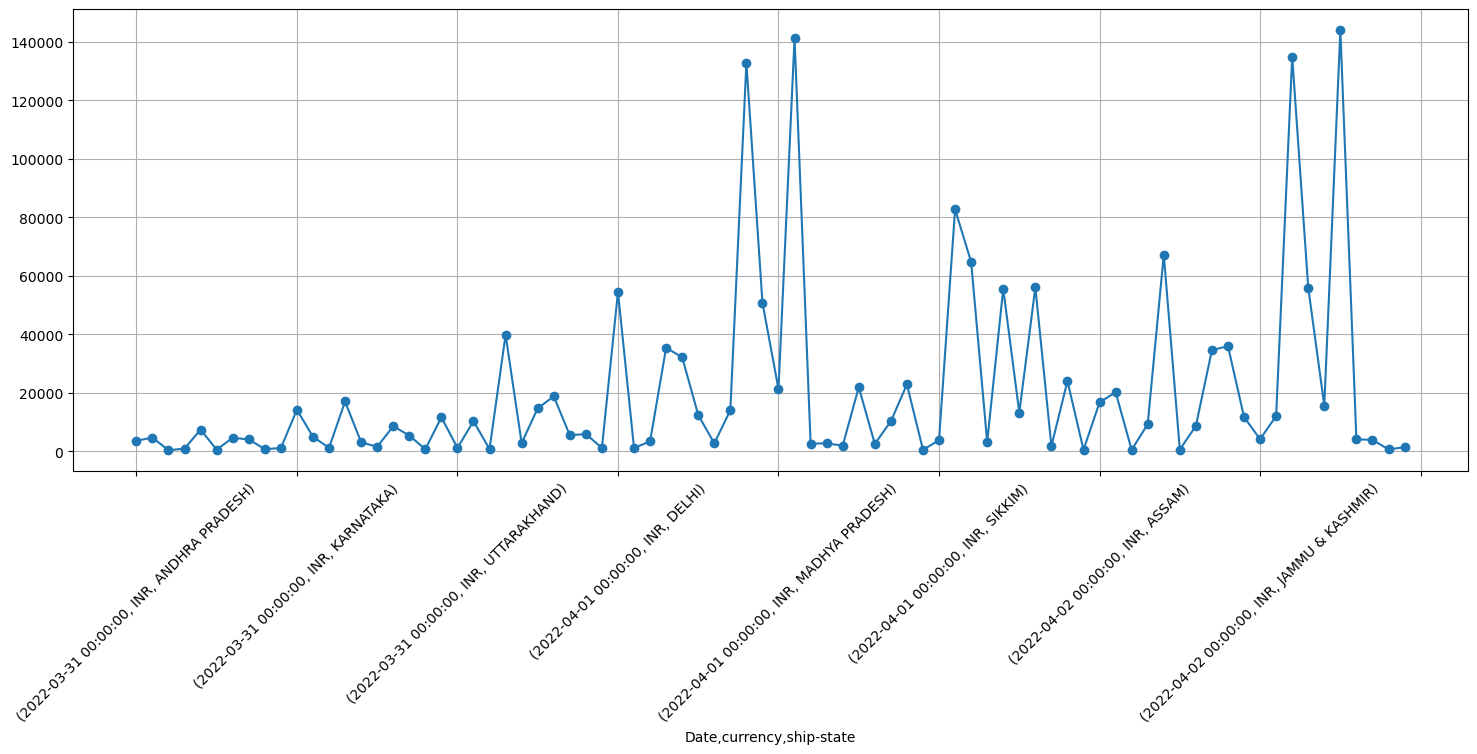

In [22]:
#How does the currency (INR) fluctuate across different order amounts, and is there any noticeable pricing difference in specific cities or states?
df[(df['currency'] == 'INR')].groupby(['Date', 'currency', 'ship-state'])['Amount'].sum()[:80].plot(kind = 'line', marker = 'o', grid = True, figsize = (18, 6), rot = 45)

In [23]:
unique_months = df['Month'].nunique()
unique_months_list = list(df['Month'].unique())
unique_months_list.pop(1)
unique_months_list

['April', 'May', 'June']

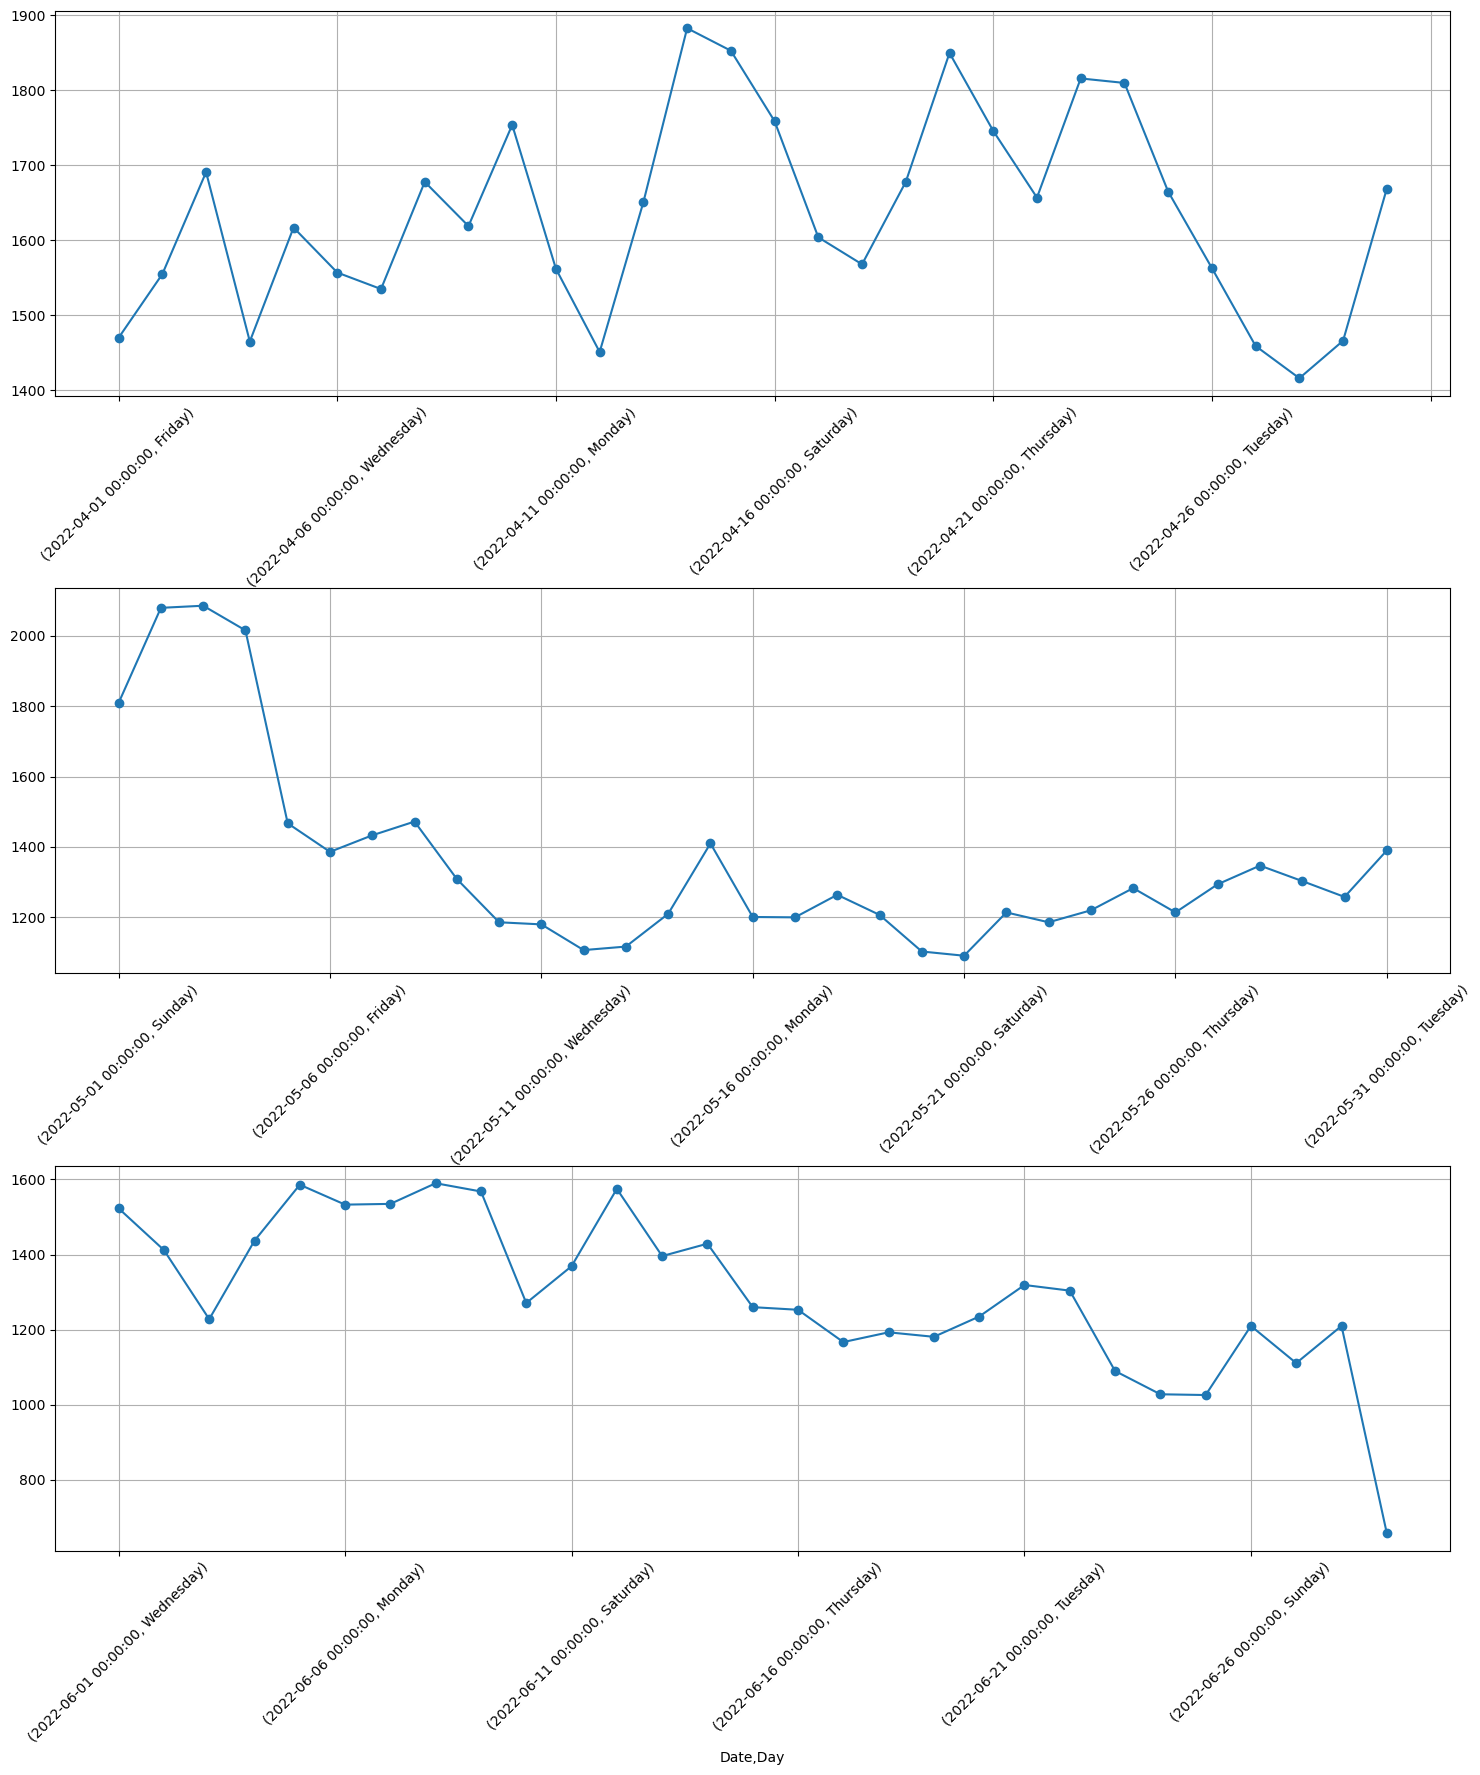

In [24]:
#Are there any patterns of orders being placed in specific months, which could indicate a change in exchange rates or promotional pricing?
fig, axes = plt.subplots(len(unique_months_list), 1, figsize = (18, 20))
plt.subplots_adjust(hspace = 0.5)
for i in range(len(unique_months_list)):
    df[(df['Month'] == unique_months_list[i])].groupby(['Date', 'Day'])['Amount'].count().plot(kind = 'line', marker = 'o', rot = 45, grid = True, ax = axes[i])


<Axes: xlabel='Date,Day,Category'>

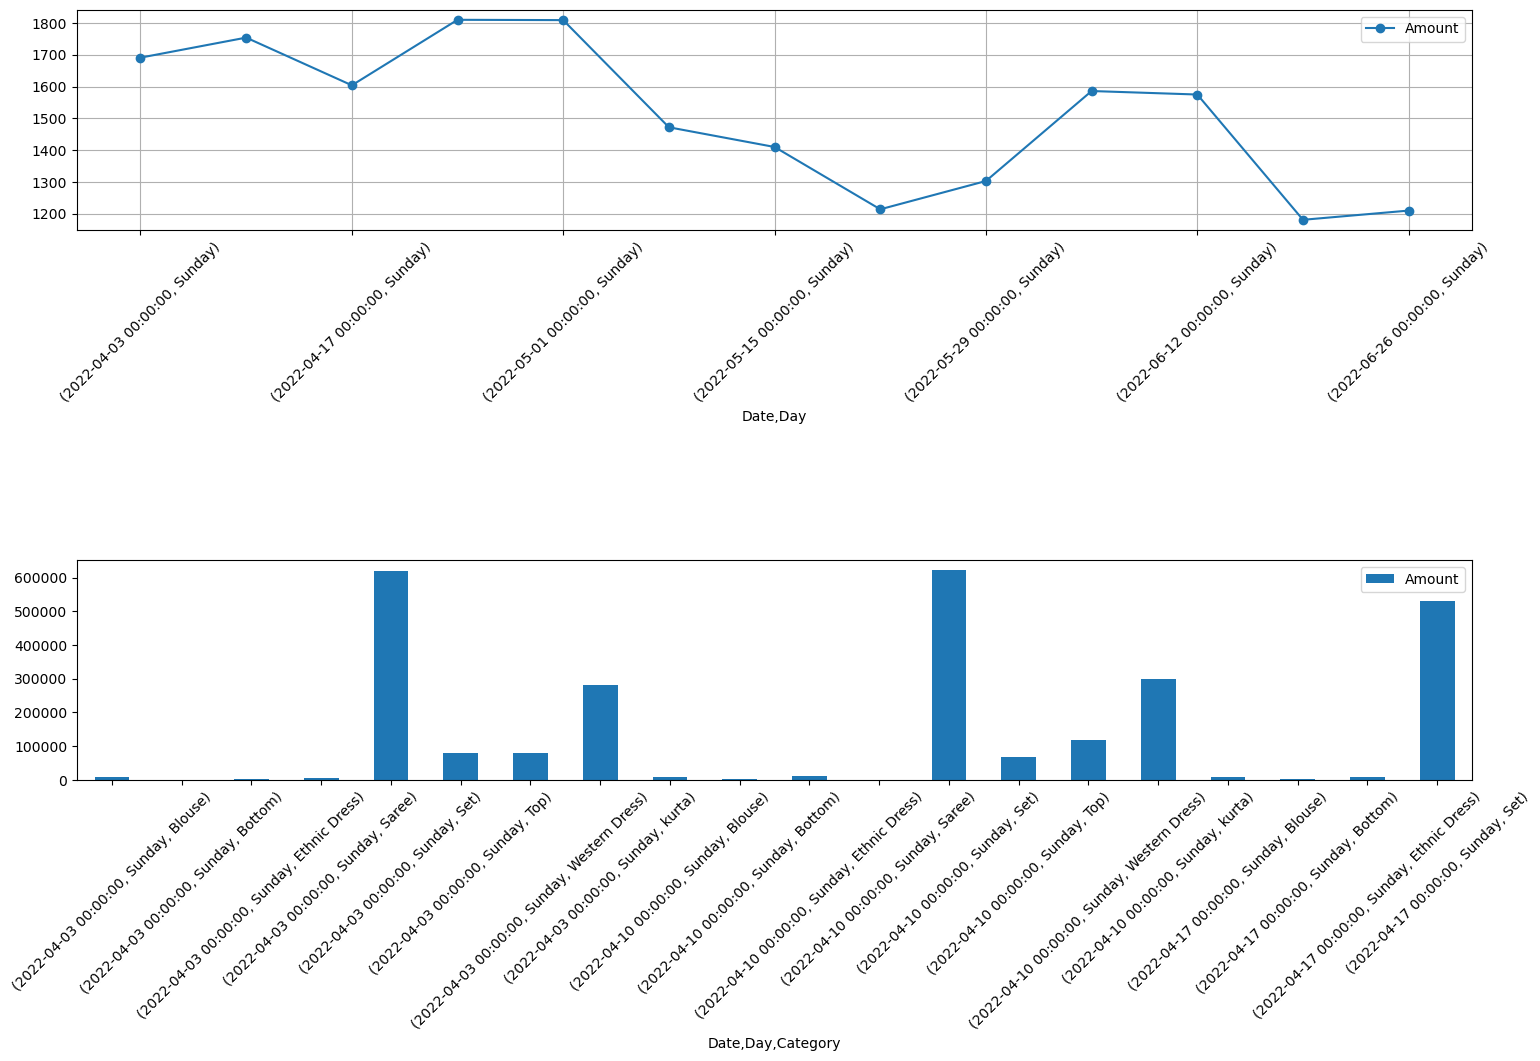

In [25]:
#Are there specific holidays (e.g., Diwali, New Year's) that significantly increase the number of orders, or do they shift demand to certain product categories?
holidays_list = [
    "2022-03-06", "2022-03-13", "2022-03-20", "2022-03-27",  # Sundays in March 2022
    "2022-04-03", "2022-04-10", "2022-04-17", "2022-04-24",  # Sundays in April 2022
    "2022-05-01", "2022-05-08", "2022-05-15", "2022-05-22", "2022-05-29",  # Sundays in May 2022
    "2022-06-05", "2022-06-12", "2022-06-19", "2022-06-26"   # Sundays in June 2022
]
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 1.5)
df[(df['Date'].isin(holidays_list))].groupby(['Date', 'Day'])['Amount'].count().plot(kind = 'line', ax = axes[0], rot = 45, marker = 'o', grid = True, legend = True)
df[(df['Date'].isin(holidays_list))].groupby(['Date', 'Day','Category'])['Amount'].sum()[:20].plot(kind = 'bar', ax = axes[1], rot = 45, legend = True)

<Axes: xlabel='Month,fulfilled-by'>

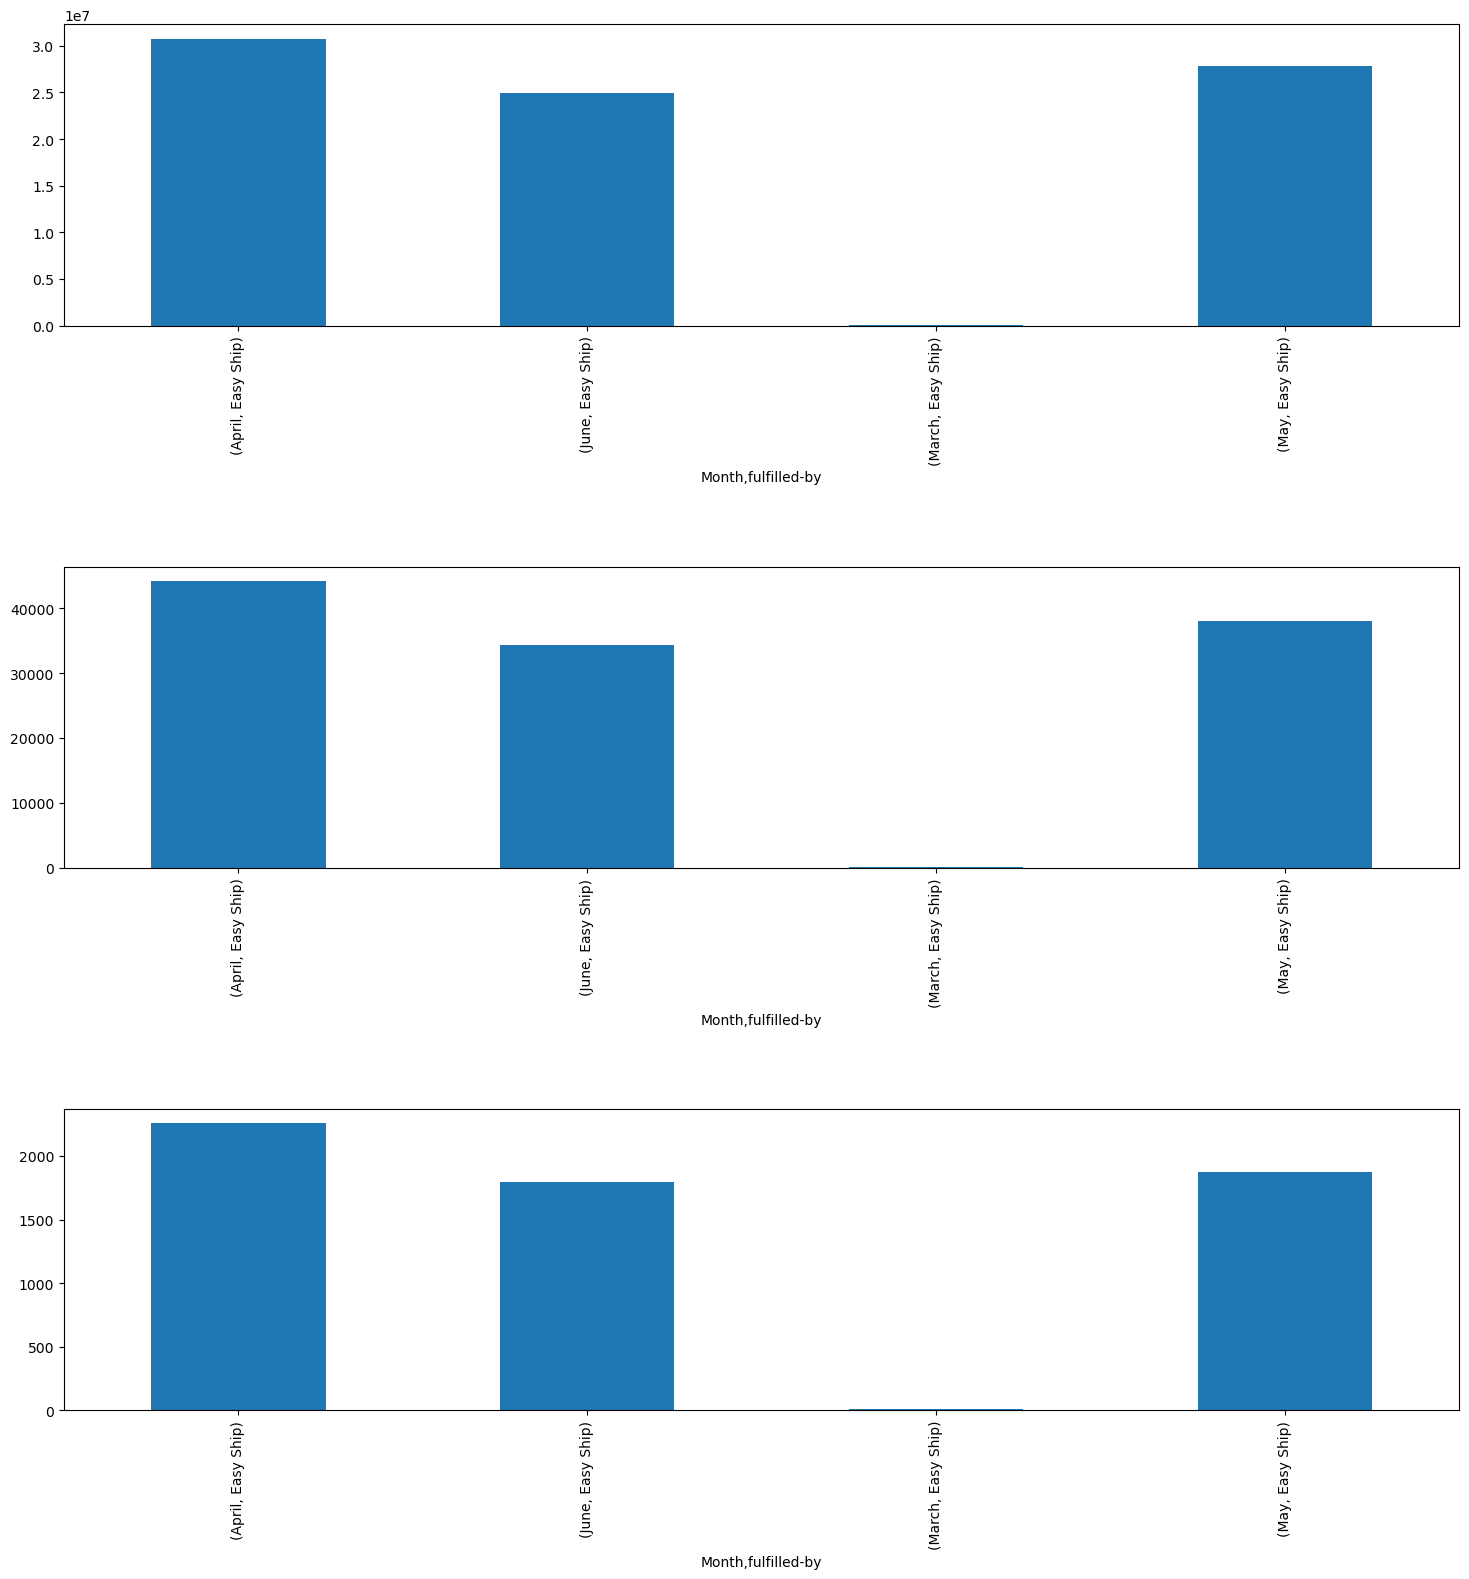

In [26]:
#How does the use of Easy Ship compared to merchant fulfillment affect the order volume, order size, and cancellation rates?
fig, axes = plt.subplots(3, 1, figsize = (18, 18))
plt.subplots_adjust(hspace = 0.8)
df[(df['fulfilled-by'] == 'Easy Ship')].groupby(['Month', 'fulfilled-by'])['Amount'].sum().astype(int).plot(kind = 'bar', ax = axes[0])
df[(df['fulfilled-by'] == 'Easy Ship')].groupby(['Month', 'fulfilled-by'])['Qty'].sum().astype(int).plot(kind = 'bar', ax = axes[1])
df[(df['fulfilled-by'] == 'Easy Ship') & (df['Courier Status'] == 'Cancelled')].groupby(['Month', 'fulfilled-by'])['Amount'].count().astype(int).plot(kind = 'bar', ax = axes[2])

In [27]:
metropolitan_cities = [
    "Bengaluru", "Bangalore", "Mumbai", "Bombay", "Delhi", "New Delhi", "Kolkata", "Calcutta", 
    "Chennai", "Madras", "Hyderabad", "Secunderabad", "Ahmedabad", "Amdavad", "Pune", "Poona", 
    "Surat", "Suryapur", "Jaipur", "Kochi", "Cochin", "Lucknow", "Chandigarh", "Indore", "Vadodara", 
    "Baroda", "Nagpur", "Bhopal", "Patna", "Kanpur", "Visakhapatnam", "Vizag", "Coimbatore", 
    "Mysuru", "Mysore", "Vijayawada", "Madurai", "Rajkot", "Faridabad", "Noida", "Gurugram", 
    "Gurgaon", "Navi Mumbai", "Thane", "Howrah", "Mangalore", "Ranchi", "Dehradun", "Jammu", 
    "Bhubaneswar", "Shimla", "Trivandrum", "Thiruvananthapuram", "Srinagar", "Panaji", "Panjim", 
    "Tiruchirappalli", "Trichy", "Guwahati", "Agra", "Vellore"
]

non_metropolitan_cities = [
    "Aligarh", "Ajmer", "Ambala", "Amritsar", "Anantapur", "Aurangabad", "Bokaro", "Chandrapur", 
    "Churu", "Dibrugarh", "Erode", "Haldwani", "Haridwar", "Hoshiarpur", "Jabalpur", "Jagdalpur", 
    "Jammu", "Jhansi", "Jorhat", "Karnal", "Kochi", "Kolar", "Korba", "Kurukshetra", "Kurnool", 
    "Ludhiana", "Moradabad", "Nagapattinam", "Nanded", "Nellore", "Raipur", "Rajahmundry", 
    "Ratlam", "Rewa", "Rishikesh", "Saharanpur", "Siliguri", "Sonipat", "Tirunelveli", "Udaipur", 
    "Ujjain", "Warangal"
]

<Axes: xlabel='Fulfilment'>

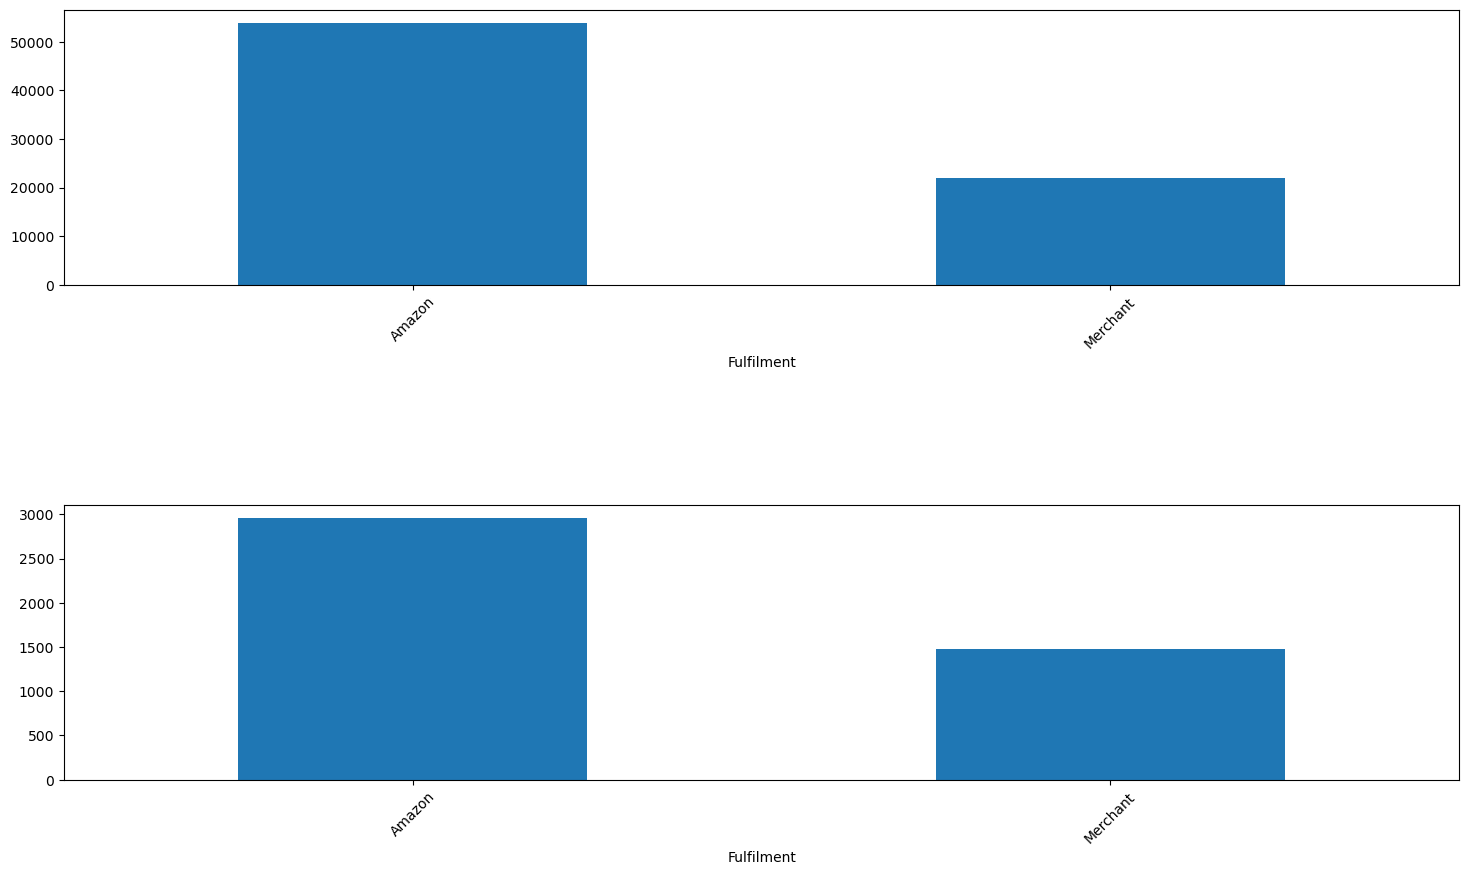

In [28]:
#Do certain regions (metro vs non-metro) prefer Amazon or merchant fulfillment channels, and how does this impact overall sales?
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 0.8)
df[(df['ship-city'].str.lower().isin([x.lower() for x in metropolitan_cities]))].groupby(['Fulfilment'])['Amount'].count().plot(kind = 'bar', rot = 45, ax = axes[0])
df[(df['ship-city'].str.lower().isin([x.lower() for x in non_metropolitan_cities]))].groupby(['Fulfilment'])['Amount'].count().plot(kind = 'bar', rot = 45, ax = axes[1])

<Axes: xlabel='ship-state'>

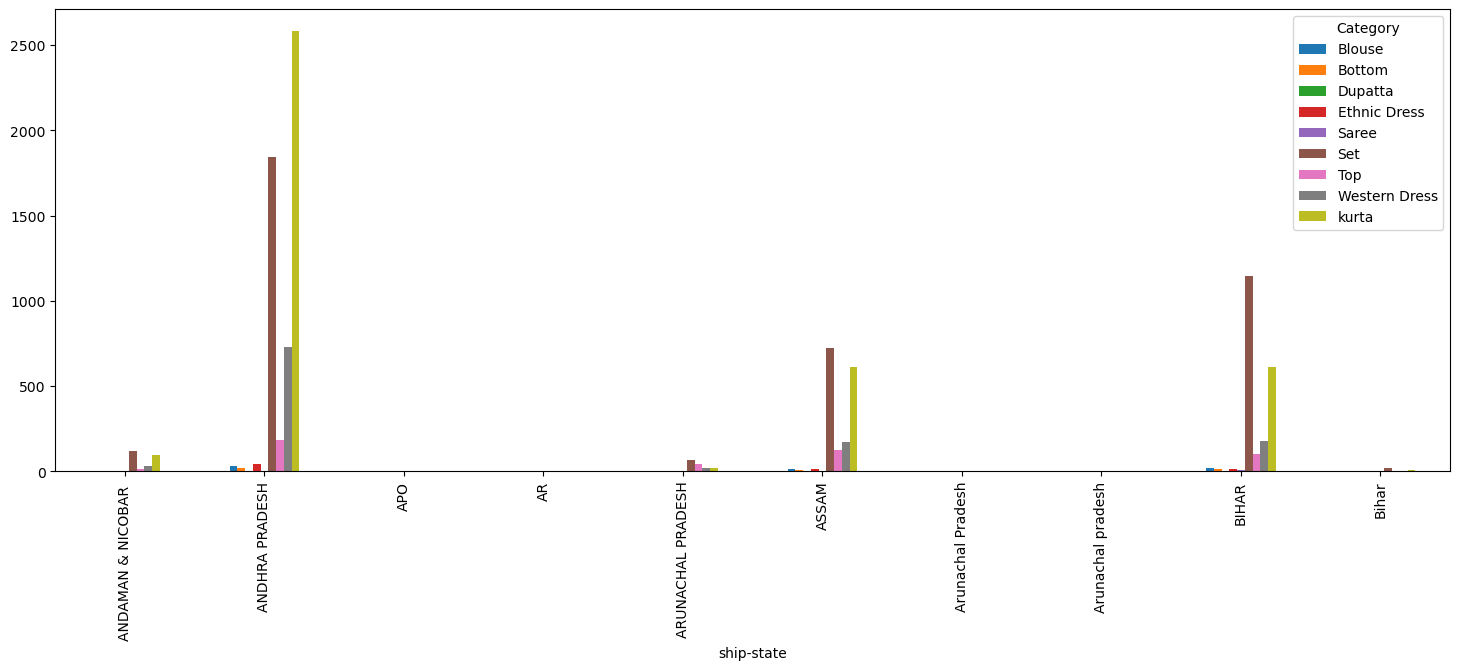

In [29]:
#Which product categories tend to generate the highest number of orders, and do these categories differ by region?
df.groupby(['ship-state', 'Category'])['Amount'].count().sort_values(ascending = False).unstack('Category')[:10].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Size'>

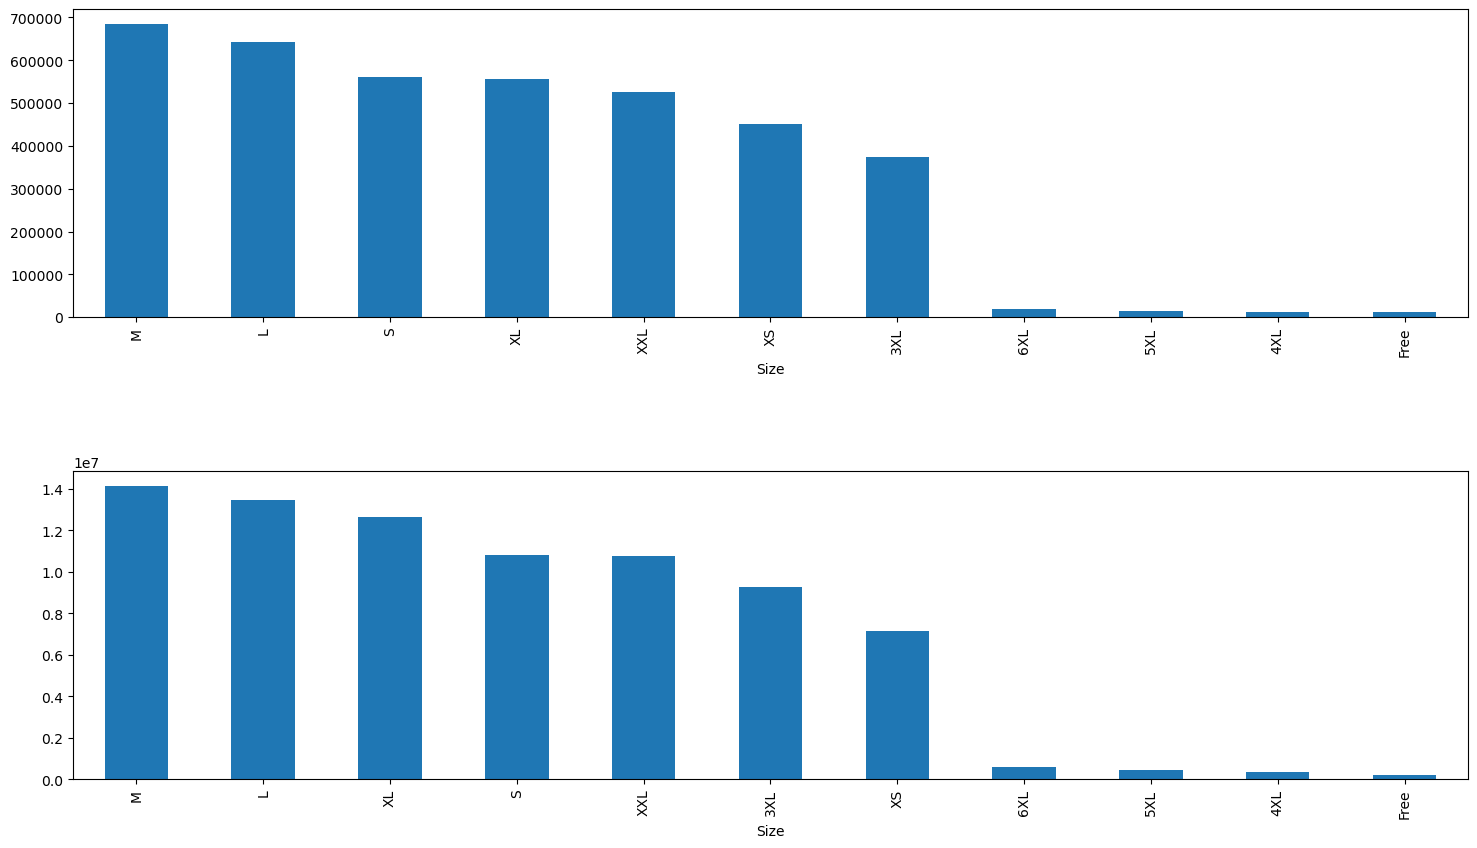

In [30]:
#Does the size of the product (e.g., small, medium, large) correlate with higher order volumes or more cancellations?
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 0.5)
df[(df['Courier Status'] == 'Cancelled')].groupby(['Size'])['Amount'].sum().sort_values(ascending = False).plot(kind = 'bar', ax = axes[0])
df[(df['Courier Status'] != 'Cancelled')].groupby(['Size'])['Amount'].sum().astype(int).sort_values(ascending = False).plot(kind = 'bar', ax = axes[1])

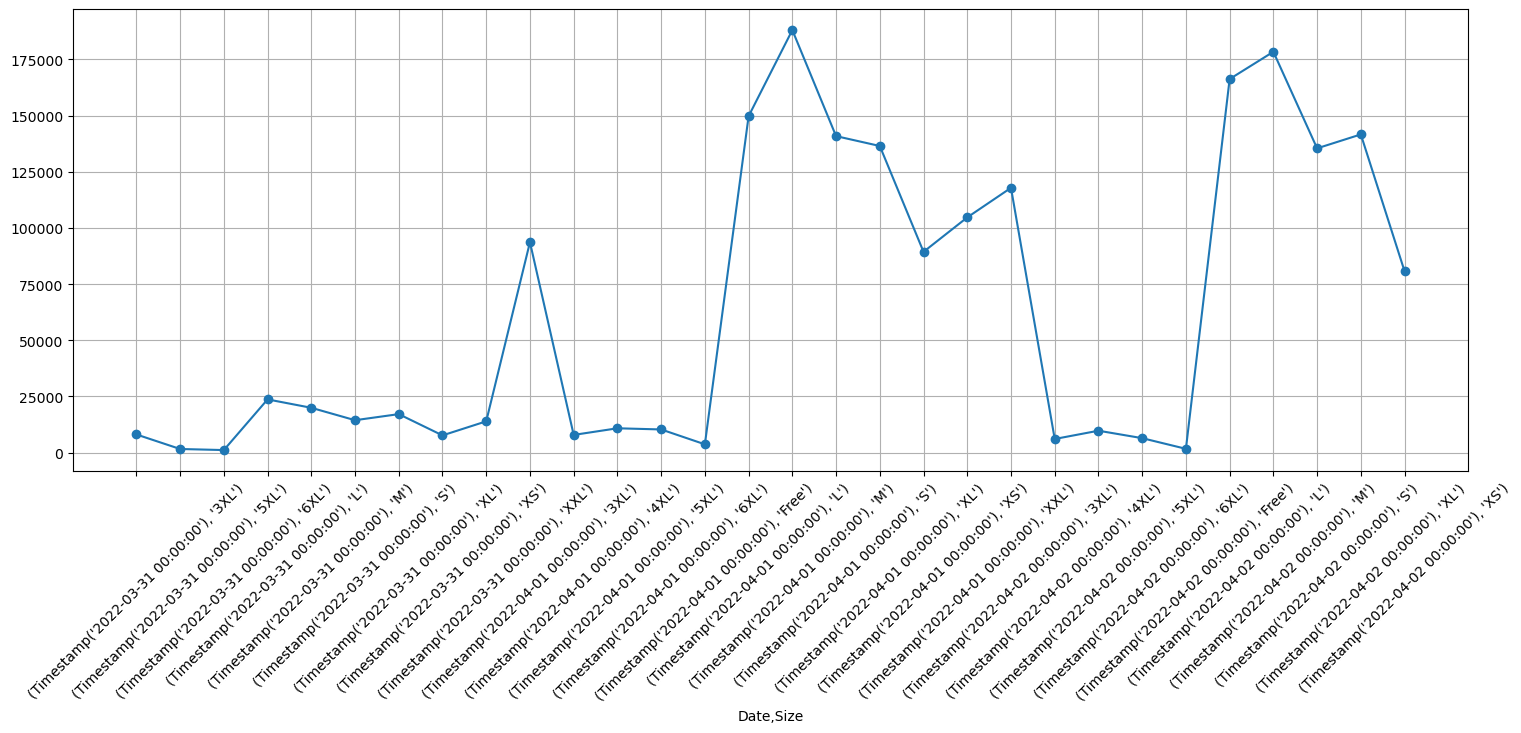

In [31]:
#How does the sales volume change across different product sizes, and are there any significant peaks in particular months?
df.groupby(['Date', 'Size'])['Amount'].sum().astype(int)[:30].plot(kind = 'line', marker = 'o', grid = True, figsize = (18, 6), rot = 45)
plt.xticks(ticks=range(len(df.groupby(['Date', 'Size'])['Amount'].sum().astype(int)[:30])), 
           labels=df.groupby(['Date', 'Size'])['Amount'].sum().astype(int)[:30].index, rotation=45)
plt.show()

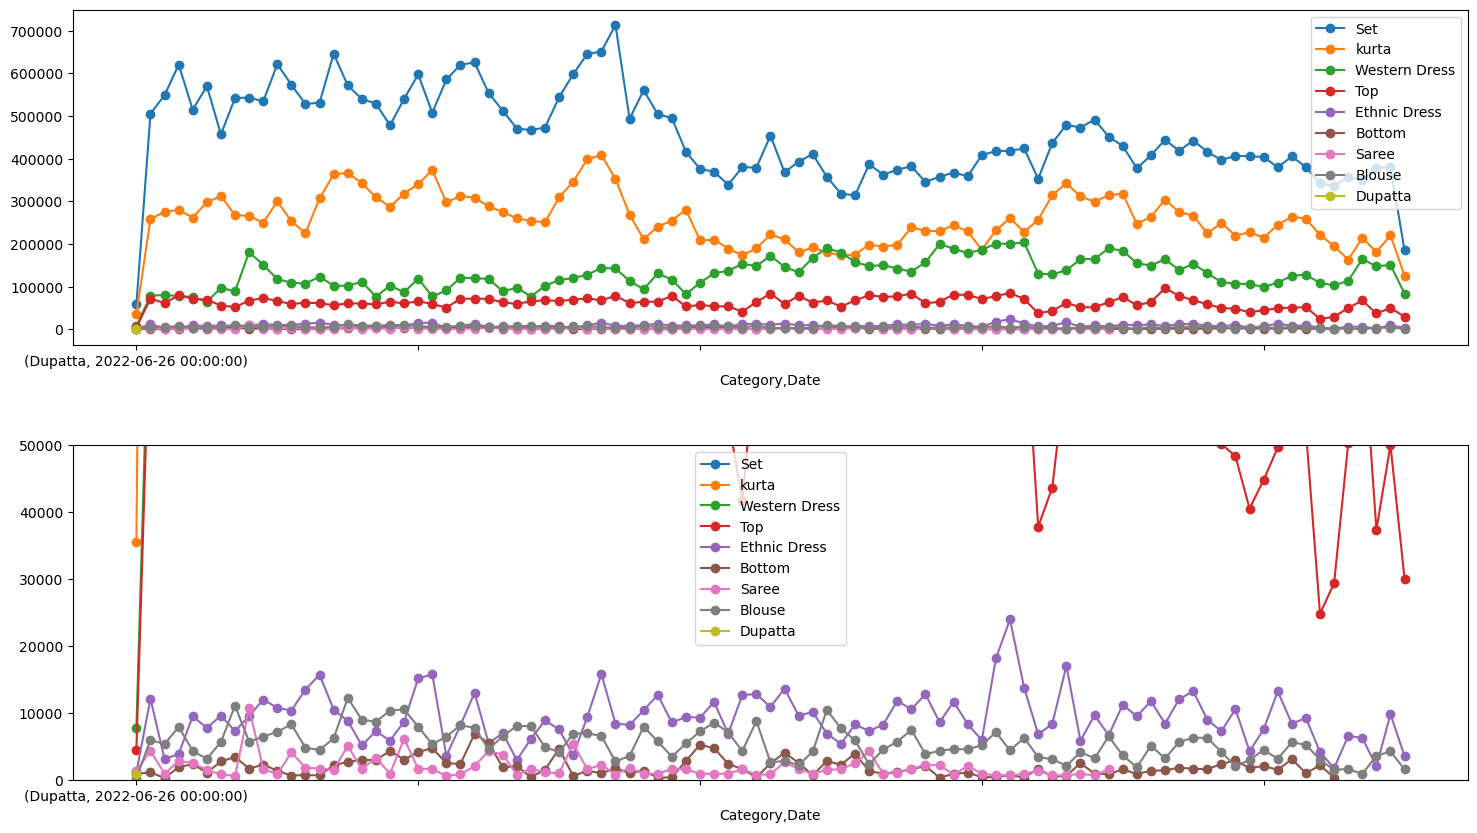

In [33]:
#Are there specific months or seasons where certain product categories experience higher sales?
unique_category = list(df['Category'].unique())
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 0.3)
for i in unique_category:
    df[(df['Category'] == i)].groupby(['Category', 'Date'])['Amount'].sum().astype(int).plot(kind = 'line', legend = True, label = i, ax = axes[0], marker = 'o')
for i in unique_category:
    df[(df['Category'] == i)].groupby(['Category', 'Date'])['Amount'].sum().astype(int).plot(kind = 'line', legend = True, label = i, ax = axes[1], marker = 'o')
plt.ylim(0, 50000)
plt.show()

In [34]:
#Which couriers have the highest percentage of lost shipments, and what can be done to address this?
df[(df['Status'] == 'Shipped - Lost in Transit')].groupby(['Sales Channel ', 'Fulfilment'])['Amount'].count()

Sales Channel   Fulfilment
Amazon.in       Merchant      5
Name: Amount, dtype: int64

<Axes: xlabel='Size'>

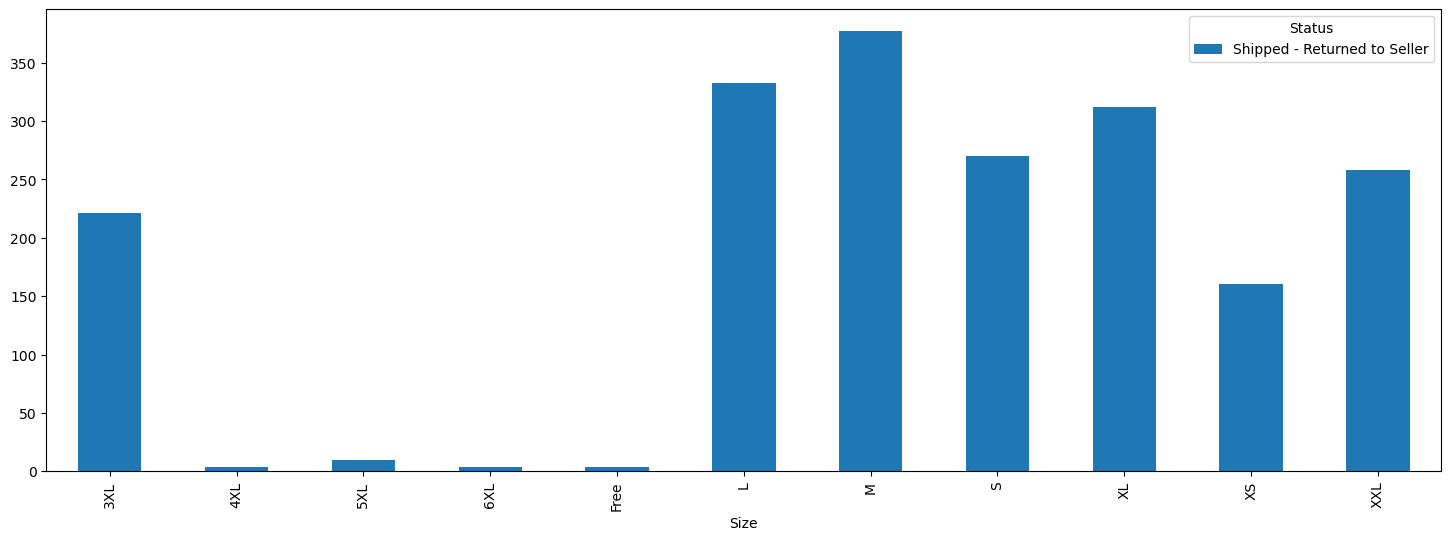

In [35]:
#Do certain product sizes (S, M, L) have higher return rates, and how can this inform future stock decisions?
df[(df['Status'] == 'Shipped - Returned to Seller')].groupby(['Status', 'Size'])['Amount'].count().unstack('Status').plot(kind = 'bar', figsize = (18, 6))

In [36]:
#Are certain SKUs being purchased repeatedly by customers, indicating higher loyalty or preference?
df['SKU'].value_counts()[:5]

SKU
JNE3797-KR-L    773
JNE3797-KR-M    657
JNE3797-KR-S    587
JNE3405-KR-L    535
J0230-SKD-M     507
Name: count, dtype: int64

<Axes: xlabel='Day'>

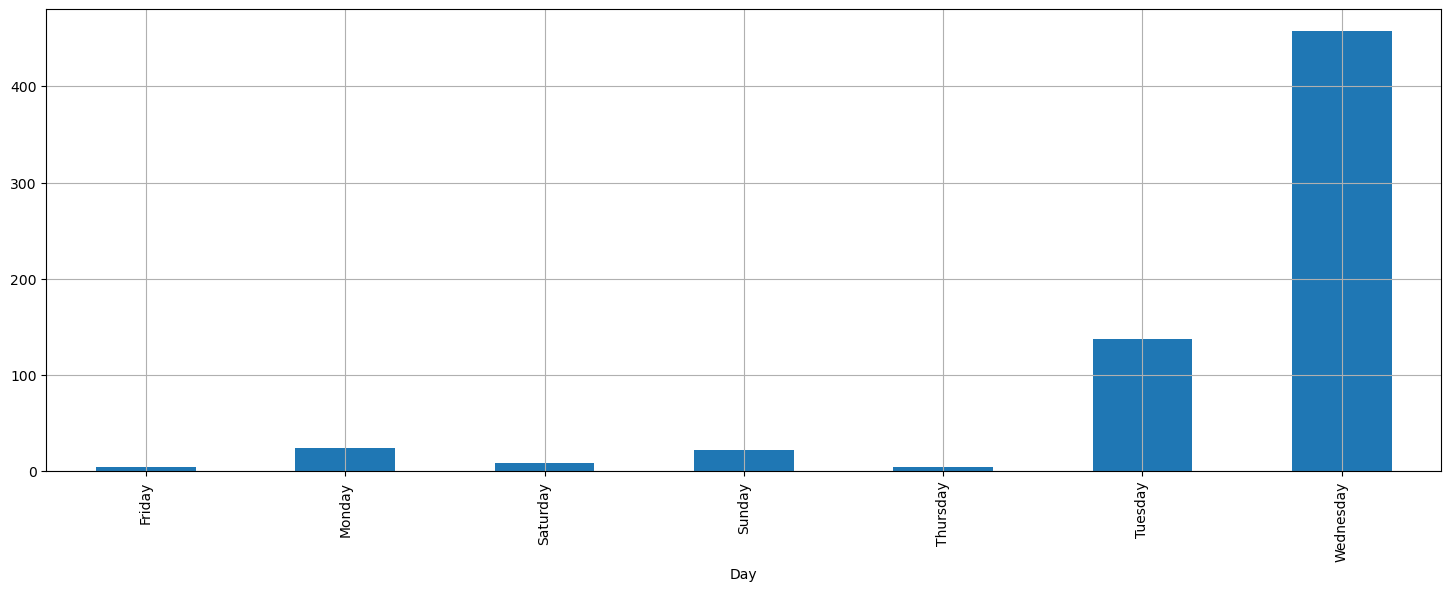

In [38]:
#Are orders placed at specific times (e.g., weekends, evenings) more prone to delays in shipping?
df[(df['Status'] == 'Pending')].groupby('Day')['Amount'].count().plot(kind = 'bar', figsize = (18, 6), grid = True)

In [39]:
#Does the method of fulfillment (Easy Ship vs Merchant) influence the likelihood of a product being returned?
df[(df['Status'] == 'Shipped - Returned to Seller')].groupby('Fulfilment')['Amount'].count()

Fulfilment
Merchant    1953
Name: Amount, dtype: int64

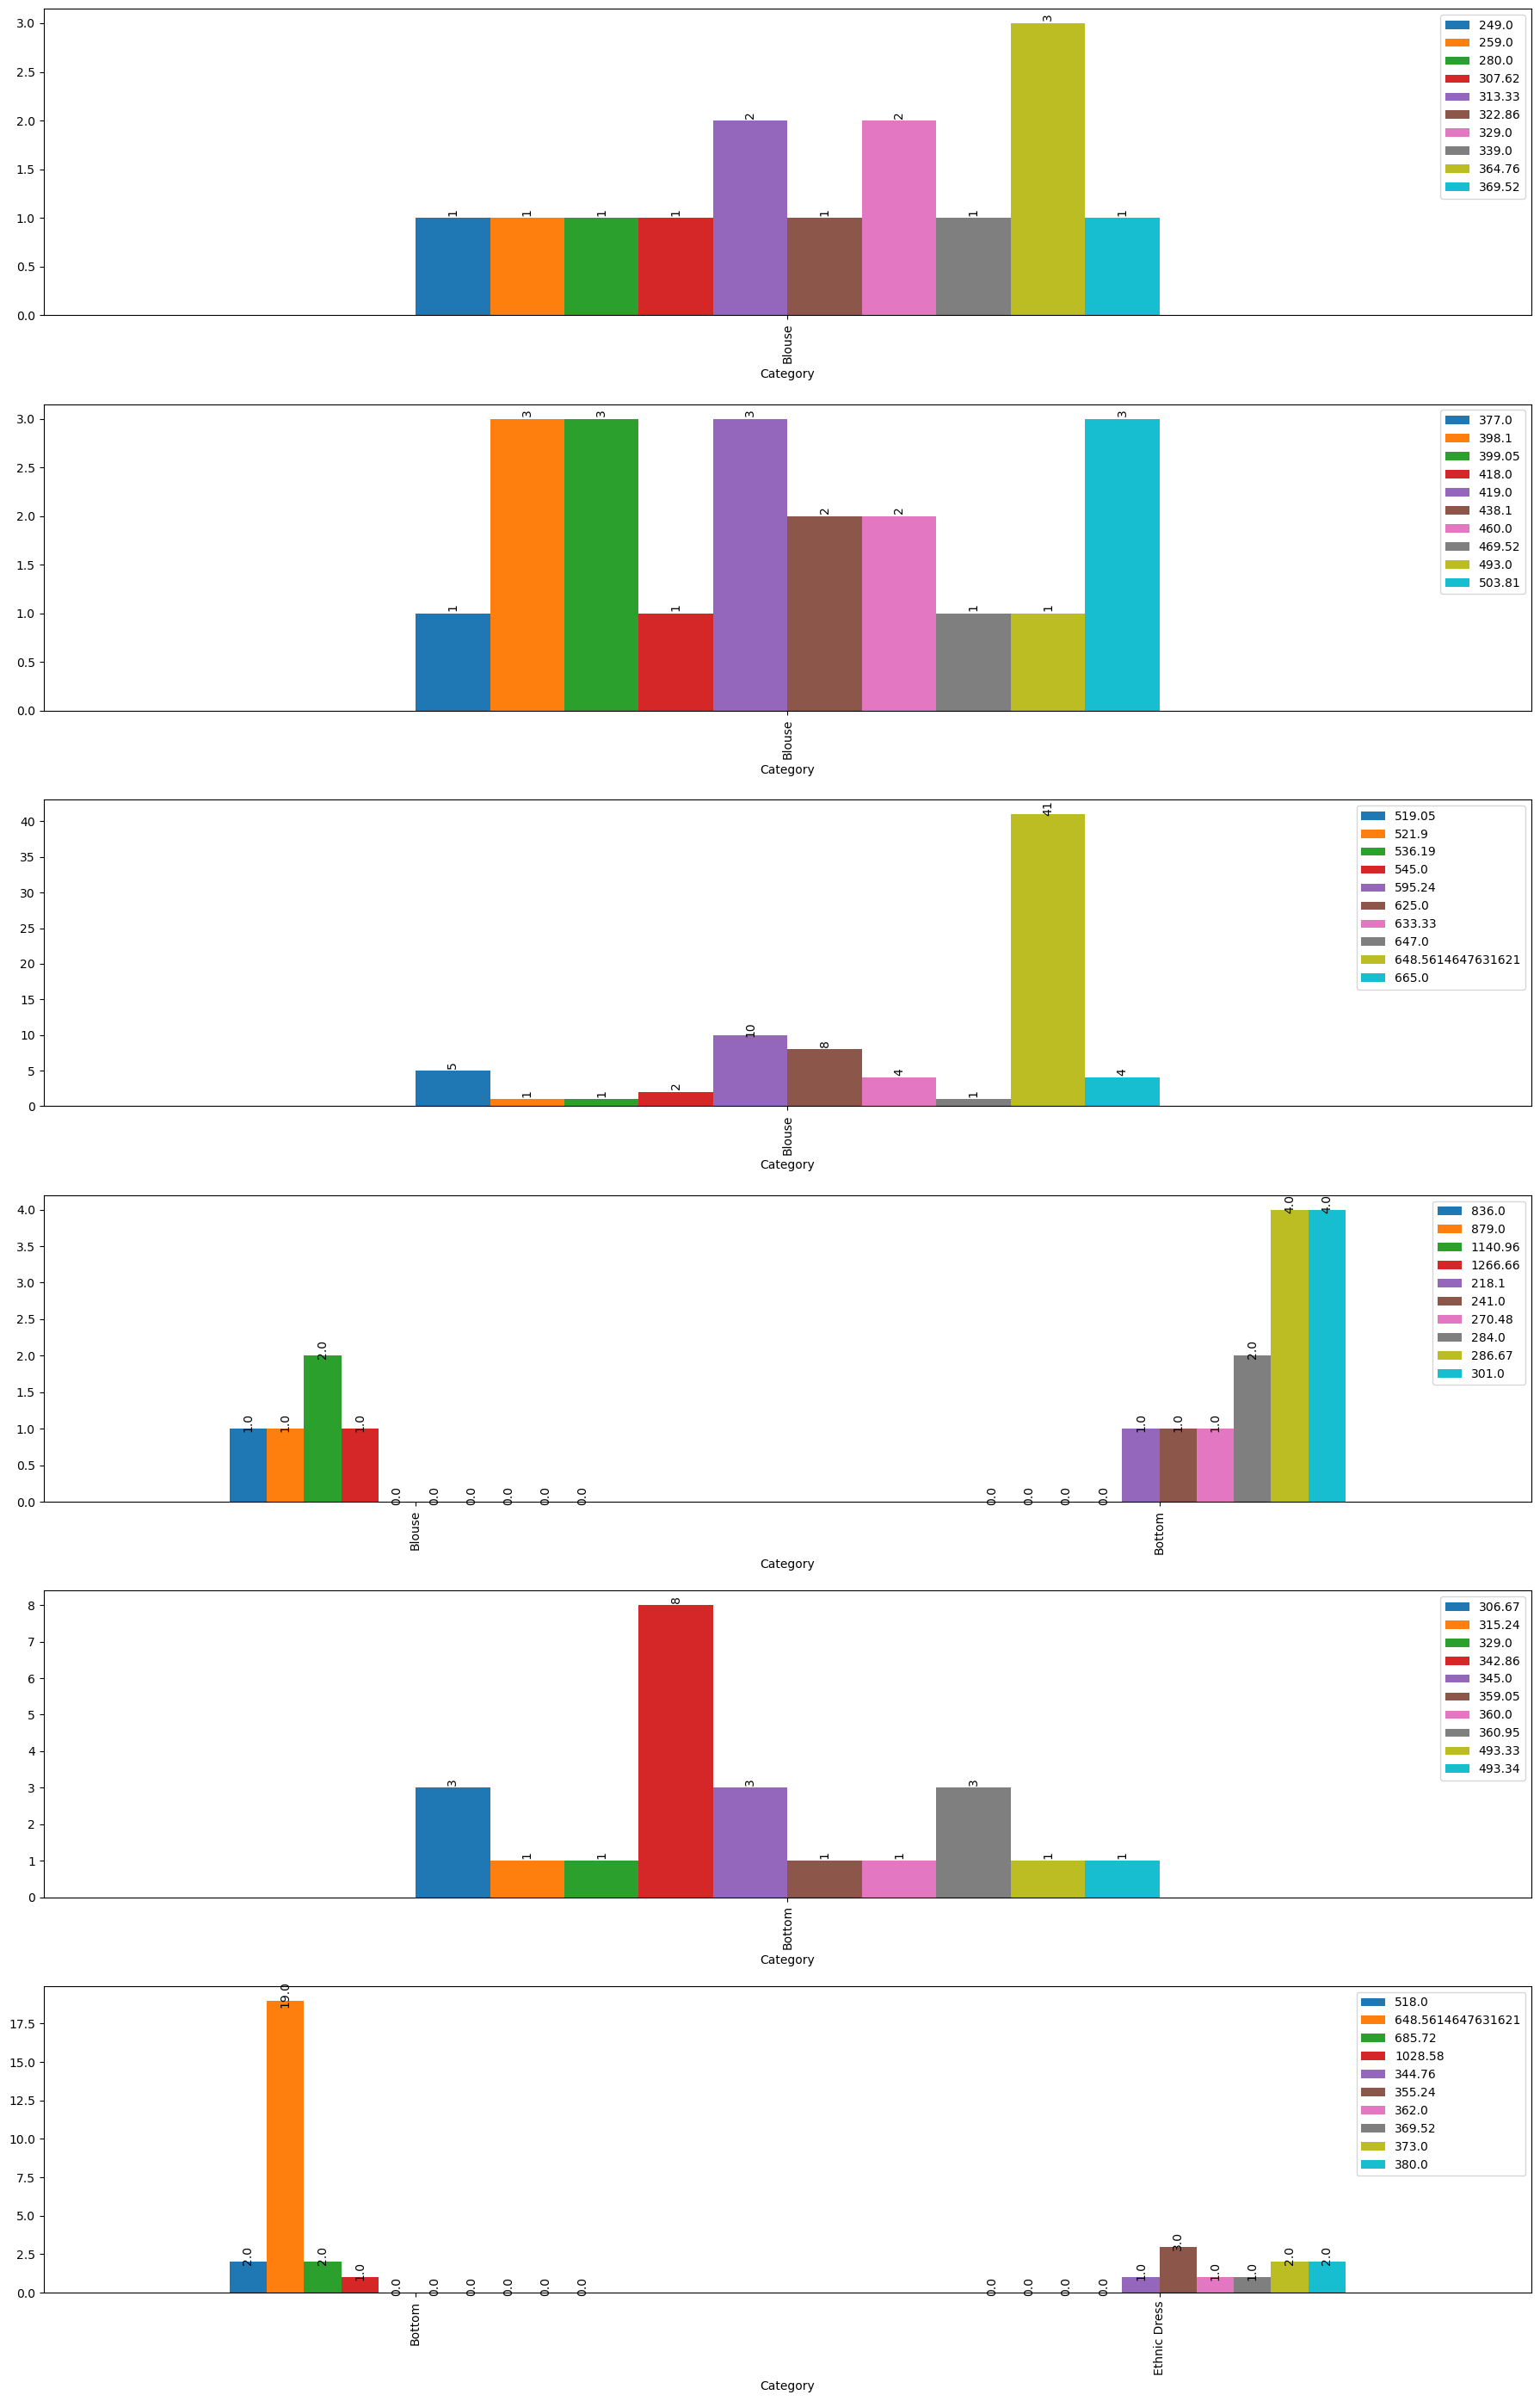

In [40]:
#Are customers more likely to purchase products at certain price points, and how does this relate to order cancellation rates?
fig, axes = plt.subplots(6, 1, figsize=(18, 28))
for i, ax in enumerate(axes):
    data = df[(df['Status'] == 'Cancelled')].groupby(['Category', 'Amount'])['Amount'].count()[i*10:(i+1)*10].unstack('Amount')
    ax = data.plot(kind='bar', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points', rotation = 90)
    ax.legend().set_visible(True)
plt.tight_layout()
plt.show()

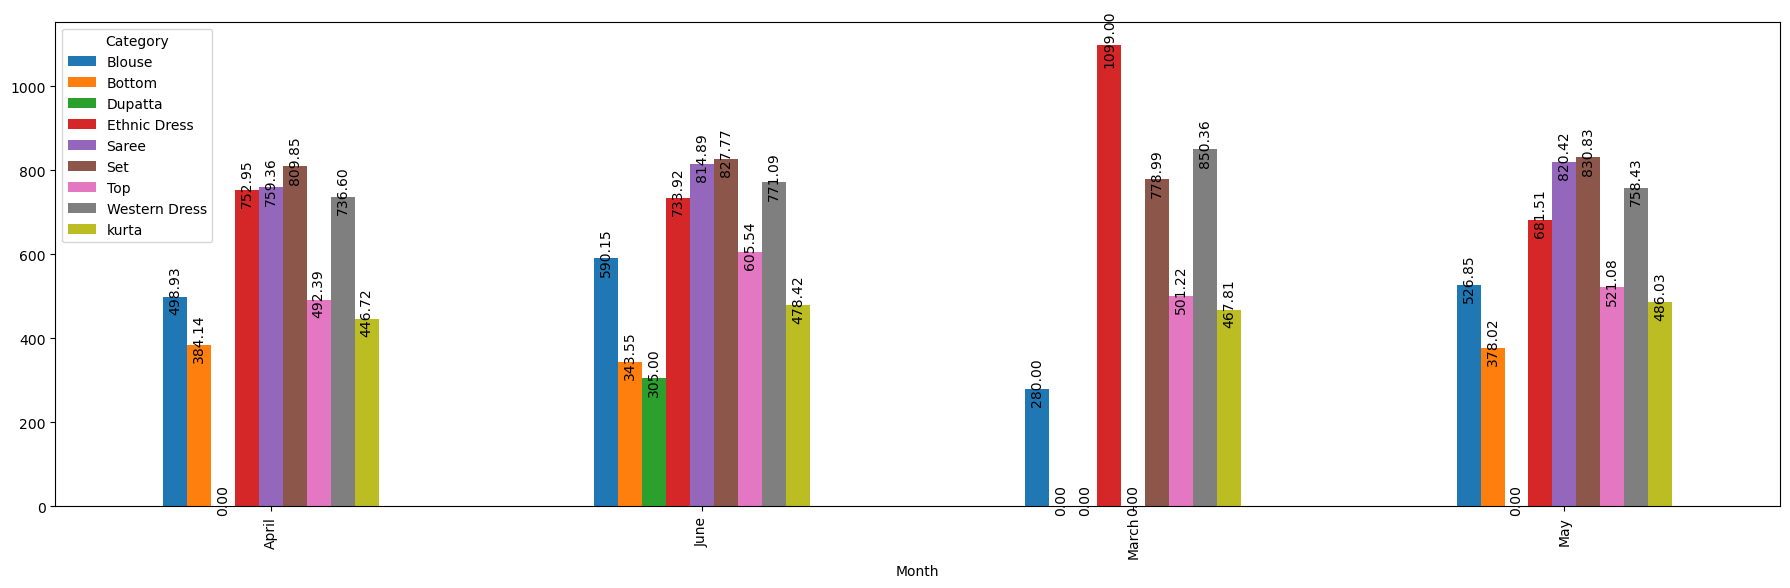

In [42]:
#Which product categories consistently generate higher average order values, and what might be influencing these trends?
grouped_data = df.groupby(['Month', 'Category'])['Amount'].mean().unstack('Category')
ax = grouped_data.plot(kind='bar', figsize=(18, 6))
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2f}', 
                (p.get_x() + p.get_width() / 2., value), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points', rotation = 90)
plt.tight_layout()
plt.show()